Neural Networks on MNIST digits dataset(Codebasics):
Reference:
https://www.youtube.com/watch?v=iqQgED9vV7k

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


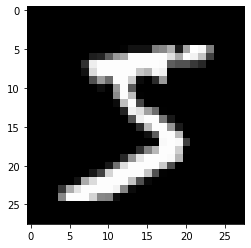

Truth value: 5


In [4]:
plt.imshow(X_train[0],cmap='gray')
plt.show()
print("Truth value:",y_train[0])

In [5]:
#scaling the datasets
X_train=X_train/255
X_test=X_test/255

#Flattening X_train and X_test
X_train_flattened= X_train.reshape(X_train.shape[0],-1)
print(X_train_flattened.shape)

X_test_flattened= X_test.reshape(X_test.shape[0],-1)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [6]:
#build,compile and fit a keras sequential model with no hidden layers
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 636us/step - loss: 0.4903 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 1s 563us/step - loss: 0.3062 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 556us/step - loss: 0.2854 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 1s 555us/step - loss: 0.2750 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 1s 553us/step - loss: 0.2677 - accuracy: 0.9260


In [7]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 460us/step - loss: 0.2655 - accuracy: 0.9261


[0.26553207635879517, 0.9261000156402588]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_predicted=model.predict(X_test_flattened)
print(y_predicted[0])
print(np.argmax(y_predicted[0]))

y_predicted_labels=[np.argmax(i) for i in y_predicted]

[2.0689389e-05 1.9479644e-10 6.3980275e-05 1.0522753e-02 1.1297676e-06
 8.4297295e-05 2.0037680e-09 6.9426292e-01 1.2734532e-04 1.1068881e-03]
7


In [10]:
#Compute comfusion matrix(to check how many erroneous or correct predictions)
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 962    0    2    2    0    3    7    2    2    0]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   4    9  932   16    6    2   13    8   38    4]
 [   1    0   22  934    0   15    2    9   19    8]
 [   1    1    6    1  909    0   12    4   10   38]
 [   9    3    4   44   10  759   21    5   30    7]
 [  11    3    7    1    7    8  917    2    2    0]
 [   2    7   27    9    7    1    0  937    2   36]
 [   7    7    8   25    9   19   10    8  876    5]
 [  11    7    1   12   26    4    0   18    8  922]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth value')

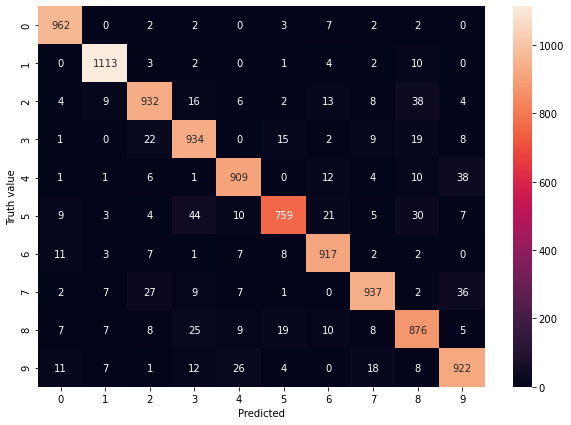

In [11]:
#use seaborn to visualize above matrix using heatmap
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')

In [12]:
#Build,compile and fit a keras model with one hidden layer
model=keras.Sequential([
    keras.layers.Dense(120, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 876us/step - loss: 0.2830 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.1271 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.0909 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.0697 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.0555 - accuracy: 0.9827


In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 584us/step - loss: 0.0886 - accuracy: 0.9724


[0.08855132013559341, 0.9724000096321106]

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
print(len(y_predicted_labels),y_test.shape)

10000 (10000,)
